# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np

#standard feed forward
from keras.models import Sequential
#dense: standard fully connected architecture
#dropout: at each step of backpropagation with some probability we drop the update of a singe node 
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

Using TensorFlow backend.


2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 2000
train: 1600


<function matplotlib.pyplot.show(*args, **kw)>

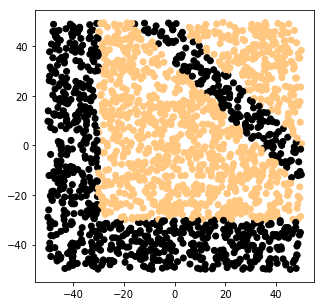

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 1600 	 Validation: 400


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [5]:
# reproducibility (?)
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_random_seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    #input layer
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    #hidden layers
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    #Dropout only in the last hidden layer
    model.add(Dropout(0.2))
    #single node output layer with sigmoid activation 
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
#deeper
if CASE==3:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 927
Trainable params: 927
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              #optimizer='adam',
              metrics=['accuracy'])

### Training

In [7]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Train on 1600 samples, validate on 400 samples
Epoch 1/400
 - 1s - loss: 0.6887 - acc: 0.5431 - val_loss: 0.6848 - val_acc: 0.5400
Epoch 2/400
 - 0s - loss: 0.6799 - acc: 0.5544 - val_loss: 0.6755 - val_acc: 0.5400
Epoch 3/400
 - 0s - loss: 0.6674 - acc: 0.5963 - val_loss: 0.6615 - val_acc: 0.6250
Epoch 4/400
 - 0s - loss: 0.6530 - acc: 0.6319 - val_loss: 0.6456 - val_acc: 0.6475
Epoch 5/400
 - 0s - loss: 0.6409 - acc: 0.6400 - val_loss: 0.6337 - val_acc: 0.6500
Epoch 6/400
 - 0s - loss: 0.6268 - acc: 0.6575 - val_loss: 0.6201 - val_acc: 0.6875
Epoch 7/400
 - 0s - loss: 0.6136 - acc: 0.7050 - val_loss: 0.6083 - val_acc: 0.7050
Epoch 8/400
 - 0s - loss: 0.6075 - acc: 0.7288 - val_loss: 0.5970 - val_acc: 0.7225
Epoch 9/400
 - 0s - loss: 0.5883 - acc: 0.7606 - val_loss: 0.5817 - val_acc: 0.7375
Epoch 10/400
 - 0s - loss: 0.5678 - acc: 0.7762 - val_loss: 0.5668 - val_acc: 0.7500
Epoch 11/400
 - 0s - loss: 0.5524 - acc: 0.7856 - val_loss: 0.5492 - val_acc: 0.7575
Epoch 12/400
 - 0s - loss: 

Epoch 97/400
 - 0s - loss: 0.2372 - acc: 0.9006 - val_loss: 0.2470 - val_acc: 0.8850
Epoch 98/400
 - 0s - loss: 0.2294 - acc: 0.9000 - val_loss: 0.2433 - val_acc: 0.8825
Epoch 99/400
 - 0s - loss: 0.2341 - acc: 0.9025 - val_loss: 0.2412 - val_acc: 0.8875
Epoch 100/400
 - 0s - loss: 0.2372 - acc: 0.8987 - val_loss: 0.2397 - val_acc: 0.8850
Epoch 101/400
 - 0s - loss: 0.2409 - acc: 0.8987 - val_loss: 0.2425 - val_acc: 0.8850
Epoch 102/400
 - 0s - loss: 0.2368 - acc: 0.9031 - val_loss: 0.2435 - val_acc: 0.8825
Epoch 103/400
 - 0s - loss: 0.2357 - acc: 0.9006 - val_loss: 0.2435 - val_acc: 0.8850
Epoch 104/400
 - 0s - loss: 0.2356 - acc: 0.9019 - val_loss: 0.2419 - val_acc: 0.8875
Epoch 105/400
 - 0s - loss: 0.2337 - acc: 0.8994 - val_loss: 0.2552 - val_acc: 0.8725
Epoch 106/400
 - 0s - loss: 0.2281 - acc: 0.9037 - val_loss: 0.2434 - val_acc: 0.8850
Epoch 107/400
 - 0s - loss: 0.2305 - acc: 0.9025 - val_loss: 0.2386 - val_acc: 0.8825
Epoch 108/400
 - 0s - loss: 0.2279 - acc: 0.9012 - val_lo

Epoch 193/400
 - 0s - loss: 0.2120 - acc: 0.9100 - val_loss: 0.2129 - val_acc: 0.8925
Epoch 194/400
 - 0s - loss: 0.2141 - acc: 0.9081 - val_loss: 0.2151 - val_acc: 0.8875
Epoch 195/400
 - 0s - loss: 0.2146 - acc: 0.9025 - val_loss: 0.2136 - val_acc: 0.8925
Epoch 196/400
 - 0s - loss: 0.2142 - acc: 0.9075 - val_loss: 0.2260 - val_acc: 0.8900
Epoch 197/400
 - 0s - loss: 0.2119 - acc: 0.9069 - val_loss: 0.2172 - val_acc: 0.8900
Epoch 198/400
 - 0s - loss: 0.2144 - acc: 0.9087 - val_loss: 0.2125 - val_acc: 0.8950
Epoch 199/400
 - 0s - loss: 0.2065 - acc: 0.9100 - val_loss: 0.2301 - val_acc: 0.8900
Epoch 200/400
 - 0s - loss: 0.2079 - acc: 0.9069 - val_loss: 0.2203 - val_acc: 0.9075
Epoch 201/400
 - 0s - loss: 0.2059 - acc: 0.9144 - val_loss: 0.2270 - val_acc: 0.8825
Epoch 202/400
 - 0s - loss: 0.2104 - acc: 0.9075 - val_loss: 0.2110 - val_acc: 0.9125
Epoch 203/400
 - 0s - loss: 0.2072 - acc: 0.9119 - val_loss: 0.2149 - val_acc: 0.8925
Epoch 204/400
 - 0s - loss: 0.2103 - acc: 0.9087 - val

Epoch 289/400
 - 0s - loss: 0.1885 - acc: 0.9150 - val_loss: 0.2116 - val_acc: 0.9200
Epoch 290/400
 - 0s - loss: 0.1963 - acc: 0.9194 - val_loss: 0.1978 - val_acc: 0.9075
Epoch 291/400
 - 0s - loss: 0.1933 - acc: 0.9187 - val_loss: 0.1961 - val_acc: 0.9025
Epoch 292/400
 - 0s - loss: 0.1907 - acc: 0.9181 - val_loss: 0.1950 - val_acc: 0.9125
Epoch 293/400
 - 0s - loss: 0.1863 - acc: 0.9175 - val_loss: 0.1901 - val_acc: 0.9000
Epoch 294/400
 - 0s - loss: 0.1916 - acc: 0.9156 - val_loss: 0.1926 - val_acc: 0.9125
Epoch 295/400
 - 0s - loss: 0.1847 - acc: 0.9200 - val_loss: 0.2067 - val_acc: 0.8850
Epoch 296/400
 - 0s - loss: 0.1916 - acc: 0.9194 - val_loss: 0.2002 - val_acc: 0.9050
Epoch 297/400
 - 0s - loss: 0.1935 - acc: 0.9194 - val_loss: 0.1915 - val_acc: 0.9000
Epoch 298/400
 - 0s - loss: 0.1954 - acc: 0.9175 - val_loss: 0.1875 - val_acc: 0.9125
Epoch 299/400
 - 0s - loss: 0.1943 - acc: 0.9194 - val_loss: 0.2093 - val_acc: 0.8925
Epoch 300/400
 - 0s - loss: 0.1884 - acc: 0.9200 - val

Epoch 385/400
 - 0s - loss: 0.1620 - acc: 0.9306 - val_loss: 0.1691 - val_acc: 0.9325
Epoch 386/400
 - 0s - loss: 0.1756 - acc: 0.9287 - val_loss: 0.1823 - val_acc: 0.8925
Epoch 387/400
 - 0s - loss: 0.1687 - acc: 0.9331 - val_loss: 0.1677 - val_acc: 0.9250
Epoch 388/400
 - 0s - loss: 0.1631 - acc: 0.9388 - val_loss: 0.1805 - val_acc: 0.9175
Epoch 389/400
 - 0s - loss: 0.1734 - acc: 0.9306 - val_loss: 0.1872 - val_acc: 0.9275
Epoch 390/400
 - 0s - loss: 0.1793 - acc: 0.9262 - val_loss: 0.1719 - val_acc: 0.9200
Epoch 391/400
 - 0s - loss: 0.1731 - acc: 0.9256 - val_loss: 0.1641 - val_acc: 0.9300
Epoch 392/400
 - 0s - loss: 0.1681 - acc: 0.9331 - val_loss: 0.1671 - val_acc: 0.9125
Epoch 393/400
 - 0s - loss: 0.1722 - acc: 0.9288 - val_loss: 0.1691 - val_acc: 0.9225
Epoch 394/400
 - 0s - loss: 0.1700 - acc: 0.9306 - val_loss: 0.1644 - val_acc: 0.9300
Epoch 395/400
 - 0s - loss: 0.1645 - acc: 0.9362 - val_loss: 0.1793 - val_acc: 0.9225
Epoch 396/400
 - 0s - loss: 0.1684 - acc: 0.9306 - val

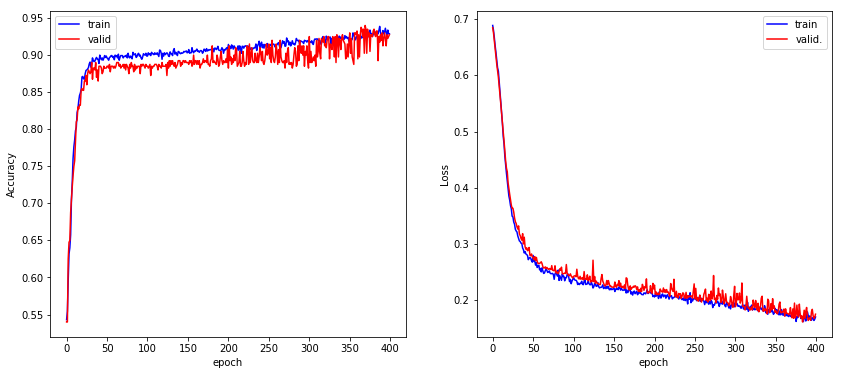

In [8]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['acc'],label="train",c="b")
ax.plot(fit.history['val_acc'],label="valid",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [9]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


ValueError: 'c' argument has 2601 elements, which is not acceptable for use with 'x' with size 2601, 'y' with size 2601.

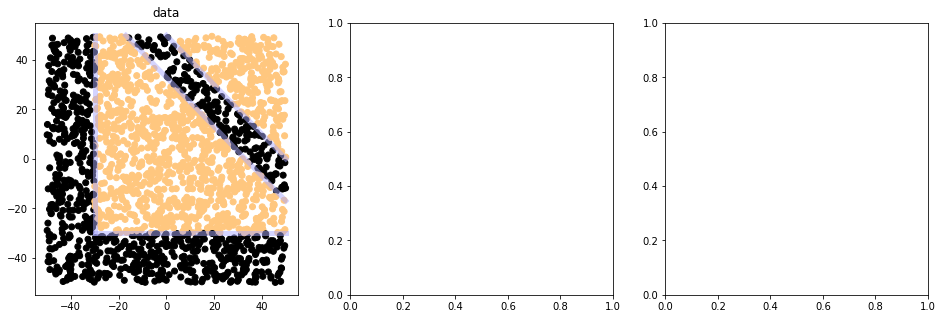

In [10]:
def boundaries():  
    x1=-30
    y1=-30
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-17),(-17,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
    
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
if TYPE==1: boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
if TYPE==1: boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
if TYPE==1: boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

In [ ]:
TYPE